<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/EXPW_IMAGE_CROP_RACE_DATASET_WORKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade Pillow

In [2]:
!git clone https://github.com/scaairesearch/da_cv_fer
import os
os.getcwd()
os.chdir('da_cv_fer')


fatal: destination path 'da_cv_fer' already exists and is not an empty directory.


In [3]:
!pip install -q -r requirements.txt # -q is for quiet install
## for some reason the below does not get installed with requirements
!pip install -q opendatasets
!pip install -q facenet_pytorch
## !pip install --upgrade Pillow # this restarts the session


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [4]:
# Installs from files
from da_cv_fer.data_config import DataConfig
# from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_sfew_crop import DatasetSFEWCROP

# from da_cv_fer.ds_expw_crop import EXPWCROP
# from da_cv_fer.ds_expw_crop_race import EXPWCROPRACE
from da_cv_fer.ds_expw_crop_image_race import EXPWIMAGECROPRACE
# from da_cv_fer.ds_expw import EXPW
from da_cv_fer.utils import *
# from da_cv_fer.model_DANN import DANN
# from da_cv_fer.model_DANN_Bespoke import DANNBespoke
from da_cv_fer.run_config import RunConfig
# from da_cv_fer.train import *
import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np
from PIL import Image


In [5]:

#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

In [6]:

# checking the mounted drive and mounting if not done
import os
if not os.path.exists('/content/gdrive'):
  from google.colab import drive
  drive.mount('/content/gdrive')
else:
    print("Google Drive is already mounted.")


Mounted at /content/gdrive


In [7]:
# EXPW

expw_obj = EXPWIMAGECROPRACE(type='val',crop_at_runtime=False)

expw_val_ds = expw_obj.get_dataset()
expw_val_loader = expw_obj.get_dataloader()
print(f' length of EXPW dataset : {len(expw_val_loader.dataset)} , {len(expw_val_ds)}')

---NOT CROPPING AT RUNTIME --
*** Starting creation of dataset based on RACE data ***
pickle_raceds_crop_list_path:  /content/gdrive/MyDrive/CV_FER/dataset/expw_raceds_crop_image_dict.pkl
self.list_img_label:  [('amazed_american_212.jpg', 0), ('angry_black_177.jpg', 0), ('angry_black_3.jpg', 0), ('angry_black_531.jpg', 0), ('angry_black_64.jpg', 0)]
expw_raceds_dict_list: [('amazed_american_212.jpg', 'African', 0), ('angry_black_177.jpg', 'African', 0), ('angry_black_3.jpg', 'African', 0), ('angry_black_531.jpg', 'African', 0), ('angry_black_64.jpg', 'African', 0)]
expw_raceds_dict_list_selected: 8458, [('amazed_american_212.jpg', 'African', 0), ('angry_black_177.jpg', 'African', 0), ('angry_black_3.jpg', 'African', 0), ('angry_black_531.jpg', 'African', 0), ('angry_black_64.jpg', 'African', 0)]
size of dataset (list_img_label): 8458
*** Completed creation of dataset based on RACE data ***
---NOT CROPPING AT RUNTIME--, flag_create_crop_contents value: False
Directory created: dataset/e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


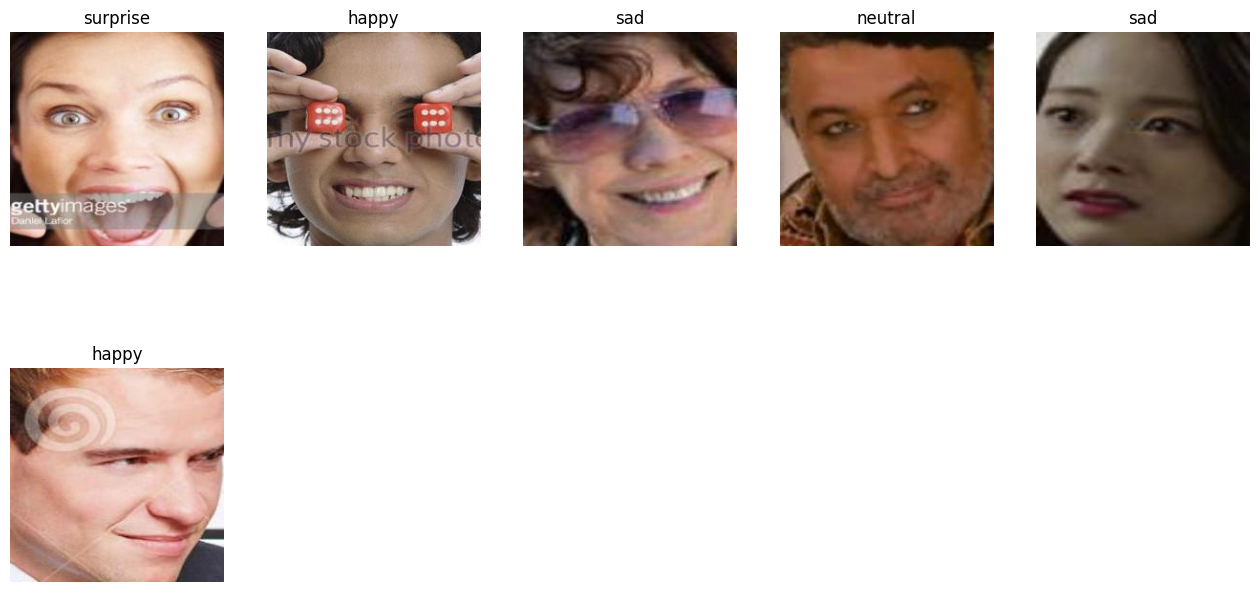

In [8]:
show_batch(expw_val_loader,expw_val_ds.labels,6,normalized=False)

In [12]:
import os
img_path = '/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop/Neutral/White/awe_worker_974.jpg'
os.path.exists(img_path)

True

In [15]:
# Open the file in binary mode
with open(img_path, 'rb') as f:
    # Read the first few bytes of the file
    file_header = f.read(4)

# Check if the file header matches a known image format
if file_header not in [b'\xff\xd8\xff', b'\x89PNG', b'\x47\x49\x46\x38']:
    print((f"Unrecognized image format: {img_path}"))
    # raise UnidentifiedImageError(f"Unrecognized image format: {img_path}")

Unrecognized image format: /content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop/Neutral/White/awe_worker_974.jpg


In [ ]:
import cv2
cv2.imread(img_path)

In [ ]:
cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

In [ ]:
import cv2
from PIL import Image
from io import BytesIO
def cv2pillow(full_image_path):
  # Read the image using OpenCV
  image_cv2 = cv2.imread(str(full_image_path))

  # Convert the image from BGR to RGB (OpenCV reads images in BGR format)
  image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

  # cv2.imshow('Image', image_rgb)



  # Convert the image to bytes
  image_bytes = cv2.imencode('.jpg', image_rgb)[1].tostring()

  # Open the image using Pillow
  img = Image.open(BytesIO(image_bytes))

  img.show()

In [ ]:
import os
img_path = '/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop/Happy/African/heartbroken_mother_551.jpg'
os.path.exists(img_path)

In [ ]:
cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

In [ ]:
cv2pillow(str(img_path))

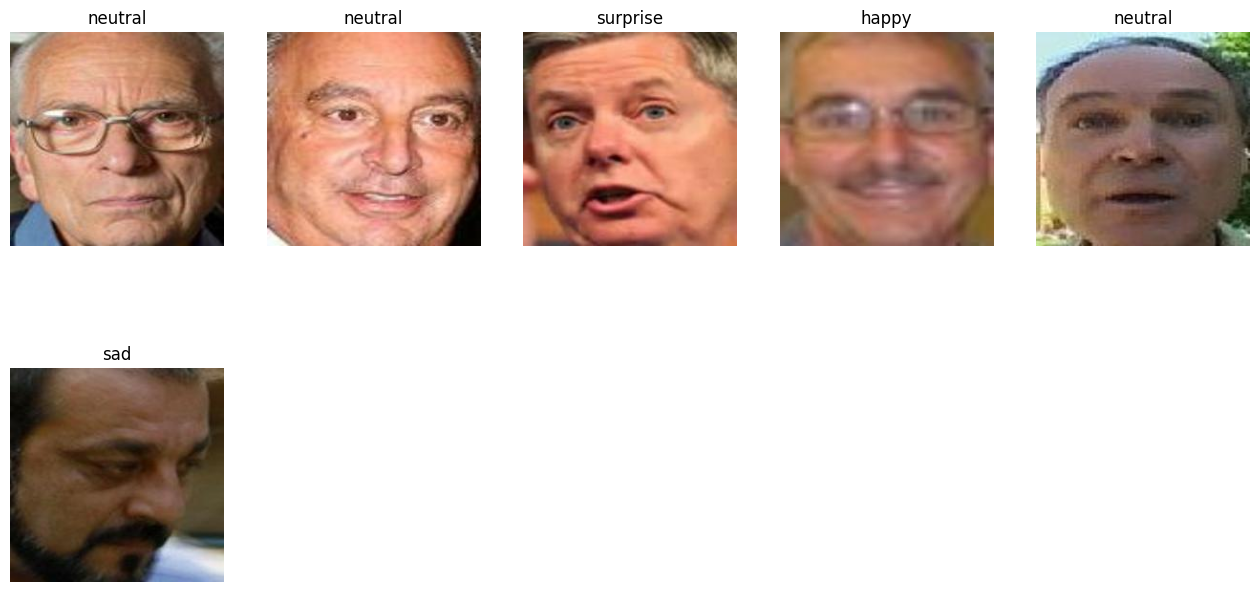

In [ ]:
/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop/Sad/White/crying_old_246.jpg

In [ ]:
/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop/Neutral/White/astound_family_684.jpg

In [ ]:
cv2.imread('/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop/Sad/White/crying_old_246.jpg')

In [ ]:
expw_val_ds.labels